In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv("/content/drug200.csv")

In [5]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
data.shape

(200, 6)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
label=LabelEncoder()

In [9]:
data['Sex_numeric_value']=label.fit_transform(data['Sex'])

In [10]:
data['Sex_numeric_value'].value_counts() # 0=Female # 1=male  

1    104
0     96
Name: Sex_numeric_value, dtype: int64

In [11]:
data['BP_numeric_values']=label.fit_transform(data['BP'])

In [12]:
data['BP_numeric_values'].value_counts() # High=0 #Low=1 #Normal=2

0    77
1    64
2    59
Name: BP_numeric_values, dtype: int64

In [13]:
data['Cholesterol_numeric_value']=label.fit_transform(data['Cholesterol'])

In [14]:
data['Cholesterol_numeric_value'].value_counts() #High=0 #Normal=1

0    103
1     97
Name: Cholesterol_numeric_value, dtype: int64

In [15]:
data['Drug_Type']=label.fit_transform(data['Drug'])

In [16]:
data['Drug_Type'].value_counts() # Drug A ,B ,C, X, Y 

0    91
4    54
1    23
3    16
2    16
Name: Drug_Type, dtype: int64

<BarContainer object of 200 artists>

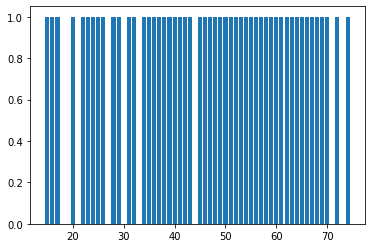

In [18]:
plt.bar(data['Age'],data['Sex_numeric_value'])

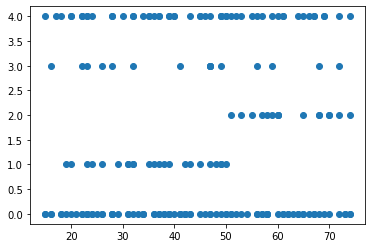

In [19]:
plt.scatter(data['Age'],data['Drug_Type'])

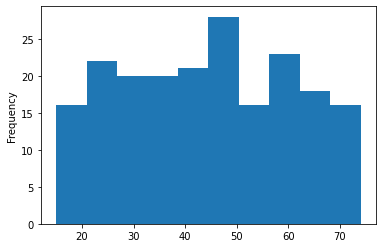

In [20]:
data["Age"].plot.hist()

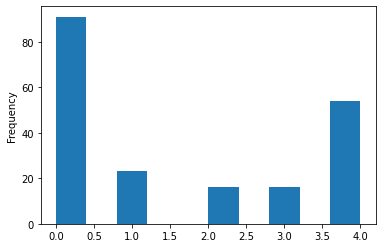

In [21]:
data['Drug_Type'].plot.hist()

In [22]:
X=data.drop('Drug_Type',axis=1)
y=data['Drug_Type']

In [43]:
X.head()

,Age,Na_to_K,Sex_numeric_value,BP_numeric_values,Cholesterol_numeric_value
0,23,25.355,0,0,0
1,47,13.093,1,1,0
2,47,10.114,1,1,0
3,28,7.798,0,2,0
4,61,18.043,0,1,0


In [39]:
X.drop(['Sex'],axis=1,inplace=True)

In [25]:
y.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug_Type, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [48]:
scaler.fit(X_train)

StandardScaler()

In [49]:
X_train_scaled=scaler.fit_transform(X_train)

In [53]:
print(X_train_scaled)

[[ 1.39698536 -0.9114338   0.93094934  1.41004     1.1055416 ]
 [-1.6008373  -0.7285102   0.93094934  1.41004     1.1055416 ]
 [-1.48092439 -0.38417525 -1.07417231 -1.08876506 -0.90453403]
 [ 0.37772565 -0.04039546  0.93094934  1.41004     1.1055416 ]
 [-0.04196952 -0.29271345  0.93094934 -1.08876506 -0.90453403]
 [-1.30105503 -1.03731522 -1.07417231  1.41004    -0.90453403]
 [-0.52162114 -1.14307226  0.93094934  1.41004     1.1055416 ]
 [-0.40170824 -0.98721247  0.93094934  0.16063747  1.1055416 ]
 [-1.24109858  2.16579087  0.93094934  1.41004    -0.90453403]
 [-0.88135986 -0.44760172  0.93094934 -1.08876506 -0.90453403]
 [ 1.45694181 -0.81775138 -1.07417231 -1.08876506  1.1055416 ]
 [ 0.1978563  -0.83468361 -1.07417231  0.16063747 -0.90453403]
 [-0.46166469 -0.0820321  -1.07417231 -1.08876506  1.1055416 ]
 [ 0.91733373 -0.78236024 -1.07417231  0.16063747 -0.90453403]
 [ 0.85737728  1.46615667 -1.07417231  0.16063747 -0.90453403]
 [ 1.27707245 -0.32088757 -1.07417231  0.16063747  1.10

In [54]:
scaler.fit(X_test)

StandardScaler()

In [55]:
X_test_scale=scaler.fit_transform(X_test)

In [28]:
X_train.shape

(140, 6)

In [29]:
X_test.shape

(60, 6)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
logReg=LogisticRegression()

In [58]:
logReg.fit(X_train_scaled,y_train)

LogisticRegression()

In [60]:
pred=logReg.predict(X_test_scale)

In [61]:
from sklearn.metrics import classification_report

In [62]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.96      0.93      0.94        27\n           1       0.67      1.00      0.80         4\n           2       0.80      0.67      0.73         6\n           3       0.60      0.75      0.67         4\n           4       0.89      0.84      0.86        19\n\n    accuracy                           0.87        60\n   macro avg       0.78      0.84      0.80        60\nweighted avg       0.88      0.87      0.87        60\n'

In [63]:
from sklearn.metrics import confusion_matrix

In [74]:
cm=confusion_matrix(y_test,pred)

Text(42.0, 0.5, 'True')

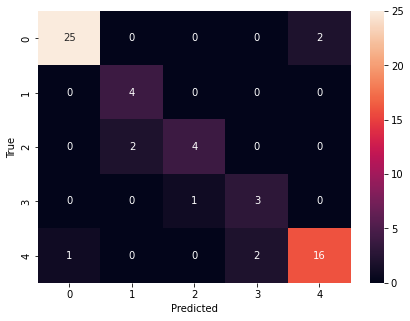

In [75]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("True")

In [65]:
from sklearn.metrics import accuracy_score

In [66]:
accuracy_score(y_test,pred)

0.8666666666666667

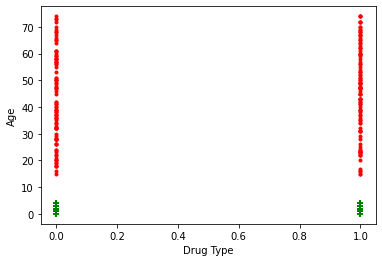

In [69]:
plt.xlabel("Drug Type")
plt.ylabel("Age")
plt.scatter(data['Sex_numeric_value'],data['Drug_Type'],color='green',marker='+')
plt.scatter(data['Sex_numeric_value'],data['Age'],color='red',marker='.')

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn=KNeighborsClassifier(n_neighbors=10)

In [72]:
knn.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=10)

In [73]:
knn.score(X_test_scale,y_test)

0.7833333333333333